# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: paying customer indicator (Y/N)

#### 2. What are the predictors/covariates? 

Answer: age, gender, location, profession, days since last log in, activity score

#### 3. What timeframe is this data relevent for?

Answer: Jan - April 2015

#### 4. What is the hypothesis?

Answer: There is no relationship between a customer becoming a paying customer and any of the predictors (age, gender, location, profession, days since last log in, activity score) or any combination thereof


## Let's get started with the ADMISSIONS dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
admit | indicates whether or not a candidate was admitted, 0 = not admitted 1 = admitted | categorical
gre | discrete integer GRE score between 0 - 800 where 800 is highest | ordinal 
gpa | grade point average score between 0.0 - 4.0 where 4.0 is highest | continuous
prestige | discrete rank of an applicant's undergraduate alma mater, with 1 being the highest and 4 as the lowest | ordinal


We would like to explore the association between admit and gre, gpa, and prestige

#### 2. What is the outcome?

Answer: admit

#### 3. What are the predictors/covariates? 

Answer: gre, gpa, prestige

#### 4. What timeframe is this data relevent for?

Answer: 
After application processes were completed and admittance was already determined, and gpa, gre scores, and prestige was already known. Only relevant for the particular time frame that the data was collected (could not find the actual date the data was collected).

#### 4. What is the hypothesis?

Answer: There is no relationship between admittance and gpa, gre scores, and prestige or any combination thereof. 


Using the above information, write a well-formed problem statement. 


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

In [45]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [52]:
# read csv file
data = pd.read_csv('/Users/irisryu/Documents/GA_IRIS_RYU/project-1/assets/admissions.csv')
data.head(20)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [56]:
dum_prestige = pd.get_dummies(data['prestige'], prefix = 'prestige')
dum_prestige.head(10)

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
5,0,1,0,0
6,1,0,0,0
7,0,1,0,0
8,0,0,1,0
9,0,1,0,0


In [60]:
data2 = data[['admit','gre','gpa']].join(dum_prestige[['prestige_1.0','prestige_2.0','prestige_3.0']])
data2.head(10)

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0
0,0,380.0,3.61,0,0,1
1,1,660.0,3.67,0,0,1
2,1,800.0,4.00,1,0,0
3,1,640.0,3.19,0,0,0
4,0,520.0,2.93,0,0,0
5,1,760.0,3.00,0,1,0
6,1,560.0,2.98,1,0,0
7,0,400.0,3.08,0,1,0
8,1,540.0,3.39,0,0,1
9,0,700.0,3.92,0,1,0


#### 1. What are the goals of the exploratory analysis? 

Answer: The goal is to test whether the null hypothesis that there is no relationship between admittance and gpa, gre scores, and prestige or any combination thereof can be rejected or will fail to be rejected. This will be done through hypothesis testing and linear regression.


#### 2a. What are the assumptions of the distribution of data? 

Answer: 
1. the data was collected randomly with no bias 
2. the data is sample data representative of the population being tested
3. there are no outliers
4. the difference in sample means are normally distributed
5. parameters are stationary

#### 2b. How will you determine the distribution of your data? 

Answer: plot it and do some tests:

1. __admit__ (outcome) is binary
2. __gre__ is sufficiently normal because:
    - the plot looks normal
    - skew is -0.15 , ~ 0
    - kurtosis is -0.33, ~ 0
    - box plot shows no outliers
3. __gpa__ is sufficiently normal because:
    - the plot looks normal
    - skew is -0.21, close to 0
    - kurtosis is -0.57, close to 0
    - box plot shows no outliers
4. __prestige__ is sufficiently normal because:
    - histogram is approximately normal (discrete value so density doesn't look as good)
    - skew is -0.09, ~ 0 
    - kurtosis is -0.89, which is higher than others but still good enough

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110f30510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1113d34d0>]], dtype=object)

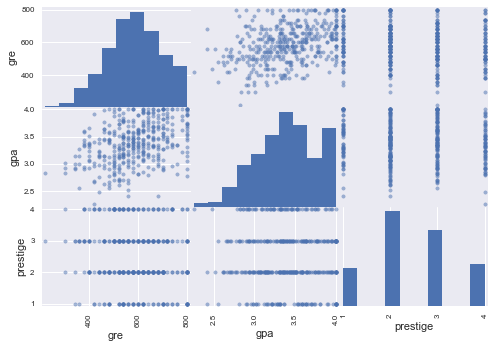

In [5]:
# plot scatter plot to look at distribution
pd.scatter_matrix(data[['gre','gpa','prestige']])

-0.150126665946
-0.330065338167


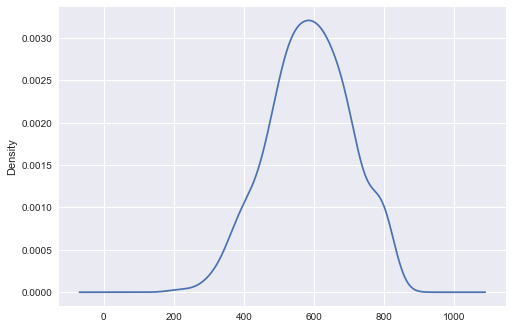

In [29]:
# test normality for gre data
print data['gre'].skew()
print data['gre'].kurt()
data['gre'].plot.density()

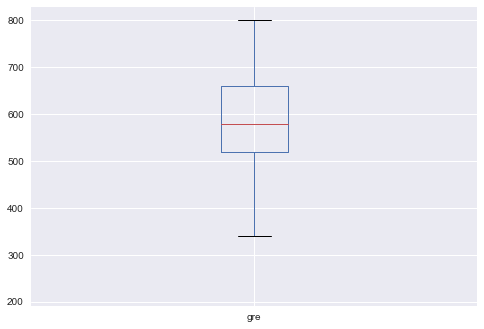

In [30]:
# look for outliers in gre
data['gre'].plot.box()

-0.211765490335
-0.574622543215


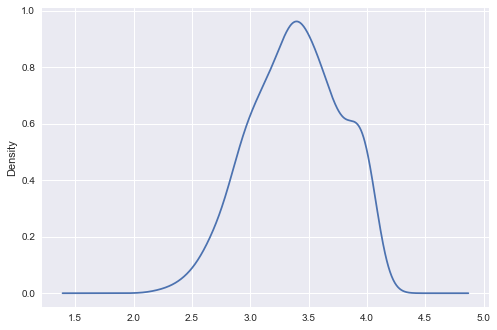

In [31]:
# test normality for gpa data
print data['gpa'].skew()
print data['gpa'].kurt()
data['gpa'].plot.density()

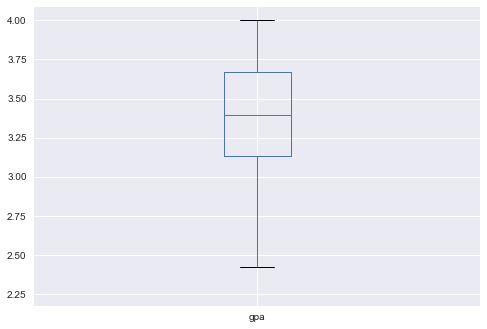

In [32]:
# look for outliers in gpa
data['gpa'].plot.box()

0.093662653554
-0.894758613394


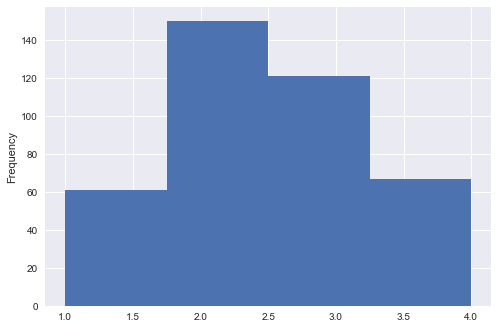

In [36]:
# test normality for prestige data
print data['prestige'].skew()
print data['prestige'].kurt()
data['prestige'].plot.hist(bins = 4)

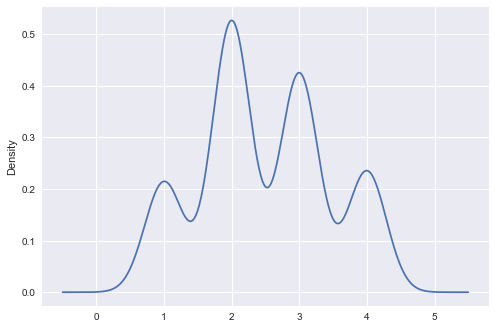

In [37]:
data['prestige'].plot.density()

#### 3a. How might outliers impact your analysis? 

Answer: assuming the distribution of the data is normal, outliers can drastically throw off normal distribution parameters (mean and standard deviation)

#### 3b. How will you test for outliers? 

Answer: create a box plot and see if there are any dots on either end of the box plot (1.5 x IQR outlier test). For our data, as mentioned in the data dictionary, there is a floor and ceiling to our data so there are no outliers, but you can also see that in the box plots

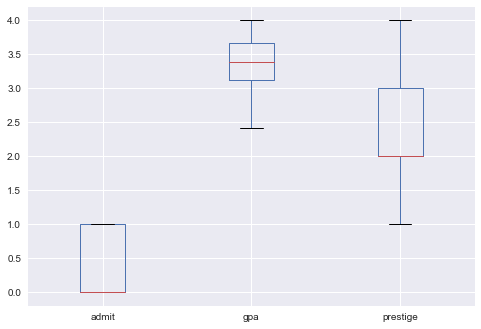

In [40]:
data[['admit','gpa','prestige']].plot.box()

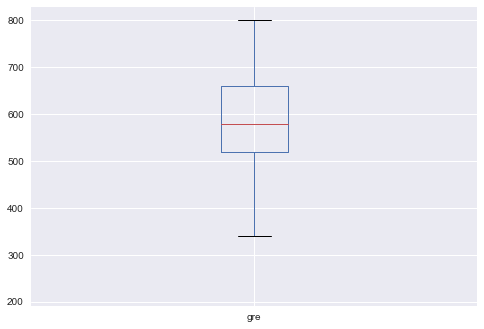

In [41]:
data['gre'].plot.box()


#### 4a. What is colinearity? 

Answer: when there is a linear relation between one variable and another (or more). If you can formulate a linear formula with 2 or more variables in that one equation, the variables are colinear. If there are more than 2 variables, it would be multi-linearity

#### 4b. How will you test for colinearity? 

Answer: create a scatter plot and see if there is a high Rsquared. Usually an R squared of 1 would mean colinearity. The example shows no colinearity because the R squared is very low and the graph doesn't show any striking linear relationship.


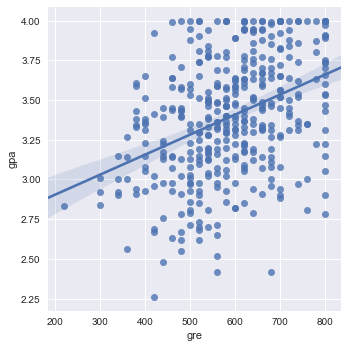

In [43]:
# check for colinearity
x = 'gre'
y = 'gpa'
sns.lmplot(x, y, data)

In [47]:
X = data[['gre']]
y = data[['gpa']]

gre_gpa = smf.ols(formula = 'y ~ X', data = data).fit()
gre_gpa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     67.66
Date:                Tue, 04 Apr 2017   Prob (F-statistic):           2.84e-15
Time:                        22:12:17   Log-Likelihood:                -147.52
No. Observations:                 397   AIC:                             299.0
Df Residuals:                     395   BIC:                             307.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.6536      0.092     28.996      0.000         2.474     2.834
X              0.0013      0.000      8.225      0.000         0.001     0.002
==============================================================================
Omnibus:                        6.571   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.116
Skew:                          -0.251   Prob(JB):                       0.0470
Kurtosis:                       2.656   Cond. No.                     3.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 

First, check the input of the data to see if there is no missing data, or the format is proper.

1. go through the data dictionary provided to understand the data 

Variable | Description | Type of Variable
---| ---| ---
admit | indicates whether or not a candidate was admitted, 0 = not admitted 1 = admitted | categorical
gre | discrete integer GRE score between 0 - 800 where 800 is highest | ordinal 
gpa | grade point average score between 0.0 - 4.0 where 4.0 is highest | continuous
prestige | discrete rank of an applicant's undergraduate alma mater, with 1 being the highest and 4 as the lowest | ordinal

2. identify what is the outcome and predictors
    - outcome: admit, predictors: gpa, gre, prestige
3. Check distribution of data through pdf plotting for continuous variables and histogram plotting for discrete variables. To check for normality, calculate skew and kurtosis
    - admit is binary, while other three are normal (see above for details)
4. identify any outliers using the 1.5 x IQR test and graphing a boxplot
    - all data did not have outliers (see above for detail)
5. Null Hypothesis: There is no relationship between admittance and gpa, gre scores, and prestige or any combination thereof. 
6. Check for colinearity between variables through scatter plots and R squared values
7. If there are categorical variables use the dummy method to avoid multi colinearity (prestige)
8. conduct hypothesis test & linear regression for:
    - admit vs gre
    - admit vs gpa
    - admit vs prestige
    - admit vs gre, gpa
    - admit vs gre, prestige
    - admit vs gpa, prestige
    - admit vs gre, gpa, prestige
9. Look at the p value for all of these combinations and see if there is a best combination of variables that has the strongest relationship with 'admit' that would reject the null hypothesis

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model